# Computational Genomics - HW2
## Mahdi Anvari 610700002

____

To identify five SNPs with significant allele frequency (AF) differences between two ethnic groups—while minimizing the risk of linkage disequilibrium (LD)—I plan to extract one SNP from each of five distinct genes. To achieve this, I first explored various genomic resources to select genes known for high population-specific variation. These genes will then be examined using the Iranome database to identify suitable SNPs.

In [59]:
GENE_LIST = {"G6PD": "https://www.iranome.com/gene/ENSG00000160211",
             "LCT": "https://www.iranome.com/gene/ENSG00000115850",
             "ABO": "https://www.iranome.com/gene/ENSG00000175164",
             "CYP2D6": "https://www.iranome.com/gene/ENSG00000100197",
             "HLA-B": "https://www.iranome.com/gene/ENSG00000234745"}

__HLA-B:__ Highly polymorphic immune gene with strong ethnic differentiation.  
__CYP2D6:__ Key gene in drug metabolism, known for copy number and allele variability across populations.  
__LCT:__ Associated with lactase persistence; exhibits clear ancestral selection signals.  
__ABO:__ Determines blood type; shows distinct allele frequency patterns among populations.  
__G6PD:__ Enzyme gene with variants common in certain regions due to malaria-driven selection.  

In [60]:
import pandas as pd
pd.DataFrame({
    "Gene_Name": ["HLA-B", "CYP2D6", "LCT", "ABO", "G6PD"],
    "SNP_Count": [449, 255, 568, 484, 145]
})

,Gene_Name,SNP_Count
0,HLA-B,449
1,CYP2D6,255
2,LCT,568
3,ABO,484
4,G6PD,145


Manually checking each SNP within the selected genes is not feasible. Therefore, I used an automated approach with Selenium to extract all available SNPs for each gene from the Iranome database. After gathering the data, I will apply several criteria to identify the most suitable SNP for each gene.

In [61]:
gene_variants = {"HLA-B": [],
             "CYP2D6": [],
             "LCT": [],
             "ABO": [],
             "G6PD": []}

In [62]:
gene_variants

{'HLA-B': [], 'CYP2D6': [], 'LCT': [], 'ABO': [], 'G6PD': []}

In [7]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import re
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [64]:
options = webdriver.EdgeOptions()
options.add_argument("start-maximized")
service = Service()
driver = webdriver.Edge(service=service, options=options)

for gene_name in GENE_LIST:
    print(f"{gene_name} variants:")
    try:
        url = GENE_LIST[gene_name]
        driver.get(url)
        WebDriverWait(driver, 15).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "table tbody tr"))
        )
    
        rows = driver.find_elements(By.CSS_SELECTOR, "table tbody tr")
        for i in range(len(rows)):
            rows = driver.find_elements(By.CSS_SELECTOR, "table tbody tr")
            link = rows[i].find_element(By.CSS_SELECTOR, "td:nth-child(1) a")
            href = link.get_attribute("href")
            link_text = link.text
            driver.get(href)
            print(f"Visited: {href}")
            html = driver.page_source
            tables = pd.read_html(html)
                            
            if tables:
                df = tables[0] 
                if link_text not in gene_variants[gene_name]:
                    gene_variants[gene_name].append(link_text)
                    df.to_csv("db/"+ gene_name +"/"+ re.sub(r'[<>:"/\\|?*]', '_', link_text) +".csv", index=False)
            else:
                print("No table found on the page.")

            time.sleep(3)
            driver.back()
            WebDriverWait(driver, 15).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "table tbody tr"))
            )
    
    finally:
        print(f"Done with gene {gene_name}.")
        
driver.quit()

G6PD variants:
Visited: https://www.iranome.com/variant/X-153759844-C-T
Visited: https://www.iranome.com/variant/X-153759858-T-C
Visited: https://www.iranome.com/variant/X-153759865-C-A
Visited: https://www.iranome.com/variant/X-153760014-C-T
Visited: https://www.iranome.com/variant/X-153760039-G-A
Visited: https://www.iranome.com/variant/X-153760079-_-GGGGC
Visited: https://www.iranome.com/variant/X-153760084-G-A
Visited: https://www.iranome.com/variant/X-153760144-TCC-_
Visited: https://www.iranome.com/variant/X-153760294-G-A
Visited: https://www.iranome.com/variant/X-153760419-G-A
Visited: https://www.iranome.com/variant/X-153760429-G-A
Visited: https://www.iranome.com/variant/X-153760462-G-A
Visited: https://www.iranome.com/variant/X-153760484-C-G
Visited: https://www.iranome.com/variant/X-153760508-A-G
Visited: https://www.iranome.com/variant/X-153760510-T-C
Visited: https://www.iranome.com/variant/X-153760552-G-A
Visited: https://www.iranome.com/variant/X-153760654-G-A
Visited: h

In [65]:
gene_variants

{'HLA-B': ['6:31321657 G / A (rs3177747)',
  '6:31321681 C / T (rs1058067)',
  '6:31321685 A / C (rs1058026)',
  '6:31321686 A / C (rs1049268)',
  '6:31321694 A / G (rs878941341)',
  '6:31321723 T / C (rs1260876937)',
  '6:31321724 C / T (rs879240746)',
  '6:31321752 T / G (rs1057412)',
  '6:31321753 T / G (rs1057387)',
  '6:31321775 G / A (rs10947205)',
  '6:31321776 T / C (rs1057151)',
  '6:31321781 AAGT / _ (rs374112227)',
  '6:31321803 G / A (rs3180225)',
  '6:31321805 A / C',
  '6:31321806 C / T (rs1056978)',
  '6:31321807 G / A (rs2770)',
  '6:31321823 G / A (rs62396266)',
  '6:31321838 C / _ (rs139093151)',
  '6:31321844 C / T (rs114910620)',
  '6:31321845 T / C (rs361531)',
  '6:31321853 A / T',
  '6:31321856 A / G (rs2768)',
  '6:31321866 C / T (rs1215930005)',
  '6:31321867 T / C (rs1264126693)',
  '6:31321875 A / G (rs991322166)',
  '6:31321882 G / A (rs2769)',
  '6:31321883 G / A (rs1056429)',
  '6:31321888 C / T (rs1471612632)',
  '6:31321889 A / G (rs1181562901)',
  '6:31

In [66]:
import json
with open('gene_variants.json', 'w') as json_file:
    json.dump(gene_variants, json_file, indent=4)

Now that all SNP variants for each selected gene have been successfully extracted from Iranome using automated Selenium scripts, the next step is to conduct a meta-analysis to identify the most informative SNPs for distinguishing between two specific ethnic groups.

# 1)

### SNP Selection Strategy: Focus on __Arab__ and __Zartoshti__ Populations  
In this analysis, the focus is on the Arab and Zartoshti populations, which have distinct historical and genetic backgrounds. These differences make them suitable candidates for identifying population-specific allele frequency divergence. The objective is to select one representative SNP per gene that shows the greatest allele frequency difference between these two groups. To ensure meaningful and reliable results, the following criteria are applied during SNP selection:

#### 1. Considerable Allele Frequency (AF) Difference
**Purpose:** Select SNPs with the largest absolute difference in allele frequency between the Arab and Zartoshti groups. This is the primary selection criterion.

#### 2. Minor Allele Frequency (MAF) > 0.1
**Rationale:** Ensures that the SNP is not ultra-rare and has enough variability to be informative.

**Application:** Discard SNPs where the alternative allele frequency is less than 10% in both Arab and Zartoshti groups.

#### 3. Sufficient Sample Support
**Criteria:**
- Allele count > 10 in both groups
- At least 50 genotyped individuals per group

**Rationale:** Ensures statistical robustness and avoids unreliable frequency estimates due to sparse data.

#### 4. Presence of Heterozygotes
**Rationale:** The existence of both homozygous and heterozygous genotypes increases flexibility for downstream modeling, especially when simulating heterozygous individuals.

**Application:** Prefer SNPs with non-zero heterozygote counts in both groups.

#### 5. Biallelic SNPs Only
**Rationale:** Simplifies probabilistic modeling and interpretation. Triallelic variants and indels may introduce unnecessary complexity.

**Application:** Exclude SNPs with more than two alleles or complex indel patterns.

#### 6. Coverage Across All 12 Iranome Ethnic Groups
**Rationale:** To enable comprehensive allele frequency analysis across all populations included in the study.

**Application:** Discard SNPs that lack allele frequency data for any of the 12 Iranome ethnic groups.

In [72]:
rows = [(gene, variant) for gene, variants in gene_variants.items() for variant in variants]
SNPs_df = pd.DataFrame(rows, columns=["Gene_Name", "Variant_Name"])
SNPs_df

,Gene_Name,Variant_Name
0,HLA-B,6:31321657 G / A (rs3177747)
1,HLA-B,6:31321681 C / T (rs1058067)
2,HLA-B,6:31321685 A / C (rs1058026)
3,HLA-B,6:31321686 A / C (rs1049268)
4,HLA-B,6:31321694 A / G (rs878941341)
...,...,...
1896,G6PD,X:153775343 A / C (rs3021074)
1897,G6PD,"X:153775360 A / C (rs1390716946,rs3021072)"
1898,G6PD,X:153775365 C / A
1899,G6PD,X:153775421 G / T (rs185623633)


In [111]:
SNPs_df.to_excel("SNPs_table.xlsx", index=False)

I begin the filtering process by applying the primary selection criterion: identifying SNPs that show the **maximum allele frequency (AF) difference** between Arab and Zartoshti populations.

This step narrows down the candidate SNPs per gene by selecting those with the most pronounced divergence between these two ethnic groups.

Other criteria (e.g., sample support, heterozygosity, biallelic status, full population coverage) will be manually evaluated in subsequent steps after narrowing the list using this primary filter.

In [103]:
SNPs_df = pd.read_excel("SNPs_table.xlsx")

In [104]:
pop1 = "Arab"
pop2 = "Zartoshti"
def extract_AF_difference(gene_name, variant_name):
    df = pd.read_csv("db/"+ gene_name +"/"+ re.sub(r'[<>:"/\\|?*]', '_', variant_name) +".csv")
    AF_difference = float(df[df["Population"]==pop1]["Allele Frequency"])-float(df[df["Population"]==pop2]["Allele Frequency"])
    return abs(AF_difference)

def extract_AF_divergance(gene_name, variant_name):
    df = pd.read_csv("db/"+ gene_name +"/"+ re.sub(r'[<>:"/\\|?*]', '_', variant_name) +".csv")
    AF1_divergance = float(df[df["Population"]==pop1]["Allele Frequency"])-0.5
    AF2_divergance = float(df[df["Population"]==pop2]["Allele Frequency"])-0.5
    result1 = abs(AF1_divergance - AF2_divergance)
    result2 = abs(AF1_divergance + AF2_divergance)
    return min([result1, result2])

In [105]:
SNPs_df["AF_difference"] = SNPs_df.apply(lambda row: extract_AF_difference(row['Gene_Name'], row['Variant_Name']), axis=1)

Because we aim to estimate the fractional ancestry of a heterozygous individual, an additional criterion is needed to ensure that the selected SNPs are informative for such inference. For example, although a SNP with a large allele frequency difference between two populations (e.g., 0.8 in population 1 and 0.2 in population 2) may appear ideal at first glance, it is actually not informative for a heterozygous individual. This is because both populations strongly favor opposite homozygous genotypes, making the presence of a heterozygote equally unlikely in either group. To address this, I introduce a criterion called allele frequency divergence, which captures how far the allele frequencies in both populations deviate from 0.5. This balance ensures that the SNP can meaningfully contribute to distinguishing ancestry while still being consistent with the heterozygous genotype observed.

In [106]:
SNPs_df["AF_divergance"] = SNPs_df.apply(lambda row: extract_AF_divergance(row['Gene_Name'], row['Variant_Name']), axis=1)

In [107]:
SNPs_sorted_df = SNPs_df.sort_values(by="AF_divergance", ascending=False)

In [108]:
SNPs_sorted_df

,Gene_Name,Variant_Name,AF_difference,AF_divergance
1070,LCT,2:136578703 A / G (rs4954451),0.30250,0.30250
1607,ABO,9:136140462 C / T (rs1633513),0.28710,0.28710
804,LCT,2:136554797 T / C (rs6430588),0.28370,0.28370
1706,ABO,9:136146920 T / G (rs663054),0.27657,0.27657
742,LCT,2:136550806 G / C (rs2083190),0.27390,0.27390
...,...,...,...,...
1784,G6PD,X:153762330 G / A (rs781917123),0.00000,0.00000
1785,G6PD,X:153762467 G / A (rs917134021),0.00000,0.00000
1786,G6PD,X:153762472 C / T (rs782036244),0.00000,0.00000
1787,G6PD,X:153762517 C / T,0.00000,0.00000


In [109]:
selected_variants = {}
for i in SNPs_sorted_df.index:
    if SNPs_sorted_df.loc[i]["Gene_Name"] not in selected_variants:
        selected_variants[SNPs_sorted_df.loc[i]["Gene_Name"]] = SNPs_sorted_df.loc[i]["Variant_Name"]

In [110]:
selected_variants

{'LCT': '2:136578703 A / G (rs4954451)',
 'ABO': '9:136140462 C / T (rs1633513)',
 'HLA-B': '6:31324201 C / G (rs1071652)',
 'CYP2D6': '22:42526049 C / G (rs1931826324,rs28371701)',
 'G6PD': 'X:153775343 A / C (rs3021074)'}

These are my selected variants. Let's save their tables into another folder and check the other criteria manually.

In [111]:
selected_variants_DFs = []
for gene in selected_variants:
    df = pd.read_csv("db/"+ gene +"/"+ re.sub(r'[<>:"/\\|?*]', '_', selected_variants[gene]) +".csv")
    selected_variants_DFs.append(df)
    df.to_csv("db/SELECTED_SNPS/" + re.sub(r'[<>:"/\\|?*]', '_', selected_variants[gene]) +".csv")

In [112]:
print(selected_variants["LCT"], "table:")
selected_variants_DFs[0]

2:136578703 A / G (rs4954451) table:


,Population,Allele Count,Allele Number,Number of Homozygotes,Number of Heterozygotes,Homozygous Genotype Freq.,Heterozygous Genotype Freq.,Allele Frequency
0,Mazani,90,200,45,0,0.450000,0.000000,0.4500
1,Zartoshti,86,200,42,2,0.420000,0.020000,0.4300
2,Baloch,66,202,33,0,0.326700,0.000000,0.3267
3,Persian Gulf Islander,58,200,29,0,0.290000,0.000000,0.2900
4,Sistani,47,200,23,1,0.230000,0.010000,0.2350
5,Gilaki,38,198,19,0,0.191900,0.000000,0.1919
6,Azeri,34,200,17,0,0.170000,0.000000,0.1700
7,Kurd,28,200,14,0,0.140000,0.000000,0.1400
8,Arab,26,204,13,0,0.127500,0.000000,0.1275
9,Persian,14,200,7,0,0.070000,0.000000,0.0700


In [113]:
print(selected_variants["ABO"], "table:")
selected_variants_DFs[1]

9:136140462 C / T (rs1633513) table:


,Population,Allele Count,Allele Number,Number of Homozygotes,Number of Heterozygotes,Homozygous Genotype Freq.,Heterozygous Genotype Freq.,Allele Frequency
0,Zartoshti,78,200,38,2,0.380000,0.020000,0.3900
1,Persian Gulf Islander,60,200,28,4,0.280000,0.040000,0.3000
2,Mazani,56,200,27,2,0.270000,0.020000,0.2800
3,Baloch,41,202,19,3,0.188100,0.029700,0.2030
4,Sistani,26,200,12,2,0.120000,0.020000,0.1300
5,Arab,21,204,10,1,0.098000,0.009800,0.1029
6,Gilaki,20,198,10,0,0.101000,0.000000,0.1010
7,Azeri,16,200,8,0,0.080000,0.000000,0.0800
8,Turkmen,16,200,8,0,0.080000,0.000000,0.0800
9,Lur,15,200,7,1,0.070000,0.010000,0.0750


In [114]:
print(selected_variants["CYP2D6"], "table:")
selected_variants_DFs[2]

22:42526049 C / G (rs1931826324,rs28371701) table:


,Population,Allele Count,Allele Number,Number of Homozygotes,Number of Heterozygotes,Homozygous Genotype Freq.,Heterozygous Genotype Freq.,Allele Frequency
0,Persian,84,200,27,30,0.270000,0.300000,0.4200
1,Gilaki,83,198,28,27,0.282800,0.272700,0.4192
2,Kurd,82,200,22,38,0.220000,0.380000,0.4100
3,Zartoshti,81,200,22,37,0.220000,0.370000,0.4050
4,Mazani,80,200,25,30,0.250000,0.300000,0.4000
5,Lur,74,200,22,30,0.220000,0.300000,0.3700
6,Persian Gulf Islander,73,200,20,33,0.200000,0.330000,0.3650
7,Turkmen,72,200,26,20,0.260000,0.200000,0.3600
8,Azeri,61,200,12,37,0.120000,0.370000,0.3050
9,Baloch,58,202,9,40,0.089100,0.396000,0.2871


In [115]:
print(selected_variants["HLA-B"], "table:")
selected_variants_DFs[3]

6:31324201 C / G (rs1071652) table:


,Population,Allele Count,Allele Number,Number of Homozygotes,Number of Heterozygotes,Homozygous Genotype Freq.,Heterozygous Genotype Freq.,Allele Frequency
0,Baloch,73,202,29,15,0.287100,0.148500,0.3614
1,Zartoshti,69,200,24,21,0.240000,0.210000,0.3450
2,Mazani,68,200,24,20,0.240000,0.200000,0.3400
3,Persian Gulf Islander,66,200,26,14,0.260000,0.140000,0.3300
4,Sistani,64,200,22,20,0.220000,0.200000,0.3200
5,Kurd,44,200,18,8,0.180000,0.080000,0.2200
6,Arab,32,204,15,2,0.147100,0.019600,0.1569
7,Azeri,31,200,14,3,0.140000,0.030000,0.1550
8,Gilaki,30,198,14,2,0.141400,0.020200,0.1515
9,Lur,16,200,6,4,0.060000,0.040000,0.0800


In [116]:
print(selected_variants["G6PD"], "table:")
selected_variants_DFs[4]

X:153775343 A / C (rs3021074) table:


,Population,Allele Count,Allele Number,Number of Homozygotes,Number of Heterozygotes,Homozygous Genotype Freq.,Heterozygous Genotype Freq.,Allele Frequency
0,Zartoshti,146,200,73,0,0.730000,0.000000,0.7300
1,Mazani,142,200,71,0,0.710000,0.000000,0.7100
2,Baloch,124,202,62,0,0.613900,0.000000,0.6139
3,Persian Gulf Islander,118,200,59,0,0.590000,0.000000,0.5900
4,Persian,94,200,47,0,0.470000,0.000000,0.4700
5,Sistani,94,200,47,0,0.470000,0.000000,0.4700
6,Azeri,90,200,45,0,0.450000,0.000000,0.4500
7,Lur,88,200,44,0,0.440000,0.000000,0.4400
8,Kurd,86,200,43,0,0.430000,0.000000,0.4300
9,Arab,82,204,41,0,0.402000,0.000000,0.4020


# 2)

We now proceed to estimate the fractional ancestry of a newly observed individual who is heterozygous at all selected SNP loci

In [141]:
import numpy as np
Arab_Probs = np.array([])
Zartoshti_Probs = np.array([])
for df in selected_variants_DFs:
    Arab_Probs = np.append(Arab_Probs, float(df[df["Population"]==pop1]["Allele Frequency"]))
    Zartoshti_Probs = np.append(Zartoshti_Probs, float(df[df["Population"]==pop2]["Allele Frequency"]))

In [142]:
Arab_Probs

array([0.1275, 0.1029, 0.2059, 0.1569, 0.402 ])

In [143]:
Zartoshti_Probs

array([0.43 , 0.39 , 0.405, 0.345, 0.73 ])

In [144]:
import matplotlib.pyplot as plt

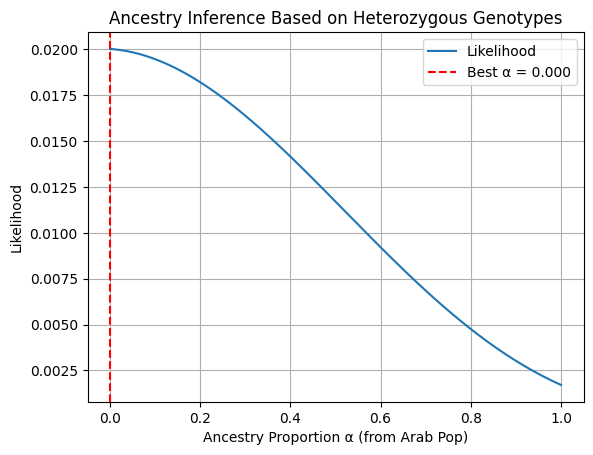

In [145]:
alphas = np.linspace(0, 1, 1000)
likelihoods = []

for alpha in alphas:
    probs = 2 * ((alpha * Arab_Probs + (1 - alpha) * Zartoshti_Probs) *
                 (1 - (alpha * Arab_Probs + (1 - alpha) * Zartoshti_Probs)))
    likelihood = np.prod(probs)
    likelihoods.append(likelihood)

likelihoods = np.array(likelihoods)
best_alpha = alphas[np.argmax(likelihoods)]

plt.plot(alphas, likelihoods, label="Likelihood")
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best α = {best_alpha:.3f}')
plt.xlabel('Ancestry Proportion α (from Arab Pop)')
plt.ylabel('Likelihood')
plt.title('Ancestry Inference Based on Heterozygous Genotypes')
plt.legend()
plt.grid(True)
plt.show()

Based on the genotype likelihood modeling, the analysis indicates that this individual has 0% ancestry from population 1 (Arab), suggesting that the selected SNPs effectively differentiate between the Arab and Zartoshti populations.